Steps and tasks:
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings
(15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

1. Read the column description and ensure you understand each attribute

In [216]:
#Importing Libraries 

import numpy as np  #Numpy
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Matplotlib
import seaborn as sns #Seaborn
%matplotlib inline
sns.set_style('whitegrid')


In [135]:
#Importing Dataset

loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [136]:
#Shape of dataframe

loan.shape

(5000, 14)

In [137]:
# Getting the Indepth details of the Dataset

loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [138]:
# Knowing about the null values and Dtypes of the Columns

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [139]:
# Removing the ID column.
# As the ID column considered as noise to the columns. so,removed the column.

loan.drop(axis = 1,columns = ['ID'],inplace = True)
loan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [140]:
# Continuous variables : Age, Experience, Income, CCAvg, Mortgage.
# Categorical variables : 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard','ZIP Code'

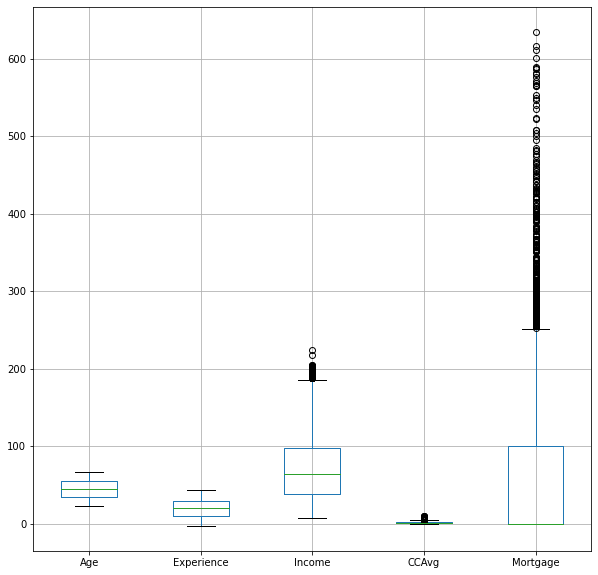

In [141]:
#Finding the outliers of continuous values

loan.boxplot(column =['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],figsize = (10,10));

In [142]:
Min = loan[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(0)
Q1 = loan[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(0.25)
Median = loan[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(0.50)
Q3 = loan[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(0.75)
Max = loan[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].quantile(1.00)
print('Interquantile range of numerical columns : ')
print(' ')
IQR = Q3 - Q1

# Interquartile range

print(IQR)

Interquantile range of numerical columns : 
 
Age            20.0
Experience     20.0
Income         59.0
CCAvg           1.8
Mortgage      101.0
dtype: float64


In [143]:
# 1rd Quartile

print(Q1)

Age           35.0
Experience    10.0
Income        39.0
CCAvg          0.7
Mortgage       0.0
Name: 0.25, dtype: float64


In [144]:
# 3st Quartile

print(Q3)

Age            55.0
Experience     30.0
Income         98.0
CCAvg           2.5
Mortgage      101.0
Name: 0.75, dtype: float64


In [145]:
# Median

print(Median)

Age           45.0
Experience    20.0
Income        64.0
CCAvg          1.5
Mortgage       0.0
Name: 0.5, dtype: float64


In [146]:
# min values

print(Min)

Age           23.0
Experience    -3.0
Income         8.0
CCAvg          0.0
Mortgage       0.0
Name: 0, dtype: float64


In [147]:
# max values

print(Max)

Age            67.0
Experience     43.0
Income        224.0
CCAvg          10.0
Mortgage      635.0
Name: 1.0, dtype: float64


In [148]:
#Upper boundary of the numerical column values.

upper_boundary = Q3 + 1.5 *IQR
print(upper_boundary)

Age            85.0
Experience     60.0
Income        186.5
CCAvg           5.2
Mortgage      252.5
dtype: float64


In [149]:
#Lower boundary of the numerical column values.

lower_boundary = Q1 - 1.5 *IQR
print(lower_boundary)

Age             5.0
Experience    -20.0
Income        -49.5
CCAvg          -2.0
Mortgage     -151.5
dtype: float64


In [150]:
print(loan['CCAvg'].mean())
print(loan['CCAvg'].median())

print(loan['Mortgage'].mean())
print(loan['Mortgage'].median())

1.9379380000000002
1.5
56.4988
0.0


In [151]:
# By replacing the outliers with zero and replacing outliers with median/mean

# As there are many outliers there is little change in values. 

# Dealing with outliers of  Income column


outlier_rows_Income = loan[loan['Income'] > 186.5]['Income'].index
loan.loc[outlier_rows_Income,'Income'] = 0
loan.loc[outlier_rows_Income,'Income'] = loan['Income'].median()

# Dealing with outliers of  CCAvg column

outlier_rows_CCAvg = loan[loan['CCAvg'] > 5.2]['CCAvg'].index
loan.loc[outlier_rows_Income,'CCAvg'] = 0
loan.loc[outlier_rows_Income,'CCAvg'] = loan['CCAvg'].median()

# Dealing with outliers of  Mortgage column

outlier_rows_Mortgage = loan[loan['Mortgage'] > 252.5]['Mortgage'].index
loan.loc[outlier_rows_Income,'Mortgage'] = 0
loan.loc[outlier_rows_Income,'Mortgage'] = loan['Mortgage'].mean()

In [153]:
loan.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.046487,-0.029216,-0.046418,-0.045554,0.041334,-0.011263,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.037996,-0.028626,-0.052563,-0.043701,0.013152,-0.009853,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.046487,-0.037996,1.000000,-0.013938,-0.151154,0.629523,-0.181954,0.189883,0.472858,-0.000771,0.166191,0.014184,0.001479
ZIP Code,-0.029216,-0.028626,-0.013938,1.000000,0.011778,-0.004141,-0.017377,0.008148,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.151154,0.011778,1.000000,-0.099639,0.064929,-0.023684,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.045554,-0.043701,0.629523,-0.004141,-0.099639,1.000000,-0.130025,0.102020,0.345116,0.017020,0.136670,-0.001947,-0.003501
Education,0.041334,0.013152,-0.181954,-0.017377,0.064929,-0.130025,1.000000,-0.032910,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.011263,-0.009853,0.189883,0.008148,-0.023684,0.102020,-0.032910,1.000000,0.122791,-0.003691,0.083928,-0.004155,-0.004959
Personal Loan,-0.007726,-0.007413,0.472858,0.000107,0.061367,0.345116,0.136722,0.122791,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.000771,0.004704,0.019994,0.017020,-0.010812,-0.003691,0.021954,1.000000,0.317034,0.012627,-0.015028


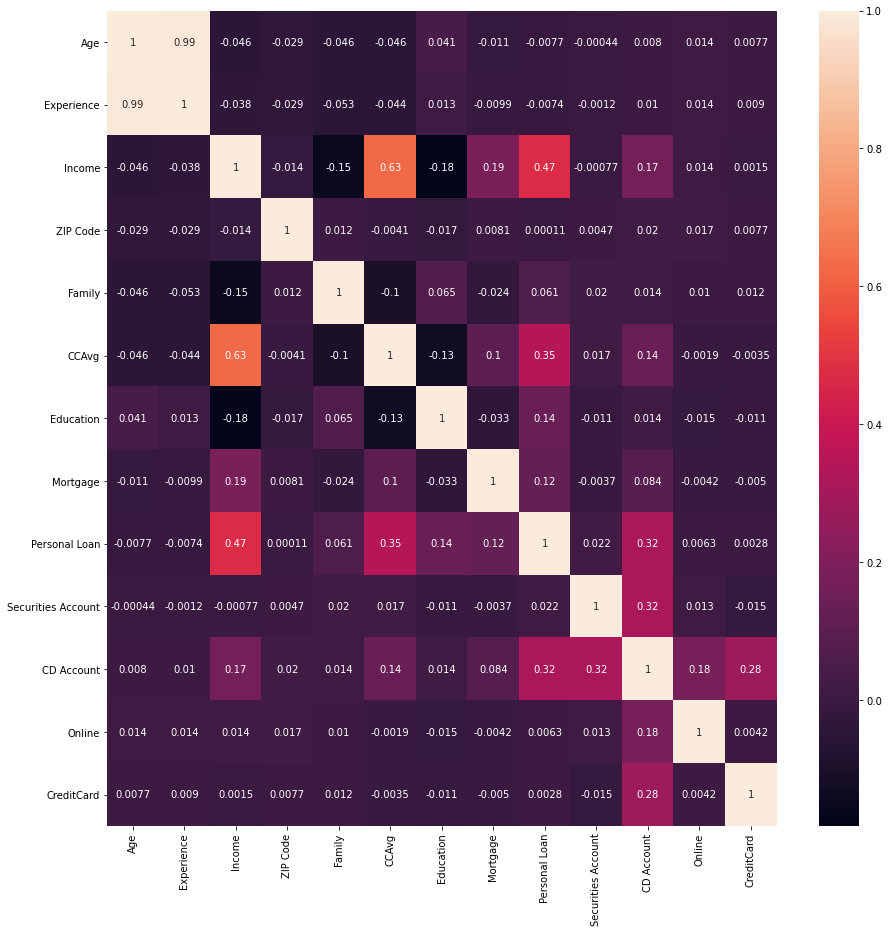

In [154]:
plt.figure(figsize = (15,15))
sns.heatmap(loan.corr(),annot = True);

--- > As there are many positively and negatively corelated columns and every column is related with the other positively or negatively Except zip code column so removing 'zip code' column.

In [155]:
# dropping the ZIP Code column as it has no corelation with other columns.

loan.drop(axis = 1,columns = ['ZIP Code'],inplace = True )

2. Study the data distribution in each attribute, share your findings (15 marks)

3. Get the target column distribution. Your comments (5 marks)

In [156]:
# Continuous variables : Age, Experience, Income, CCAvg, Mortgage.
# Categorical variables : 'Family', 'Education', 'Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard'

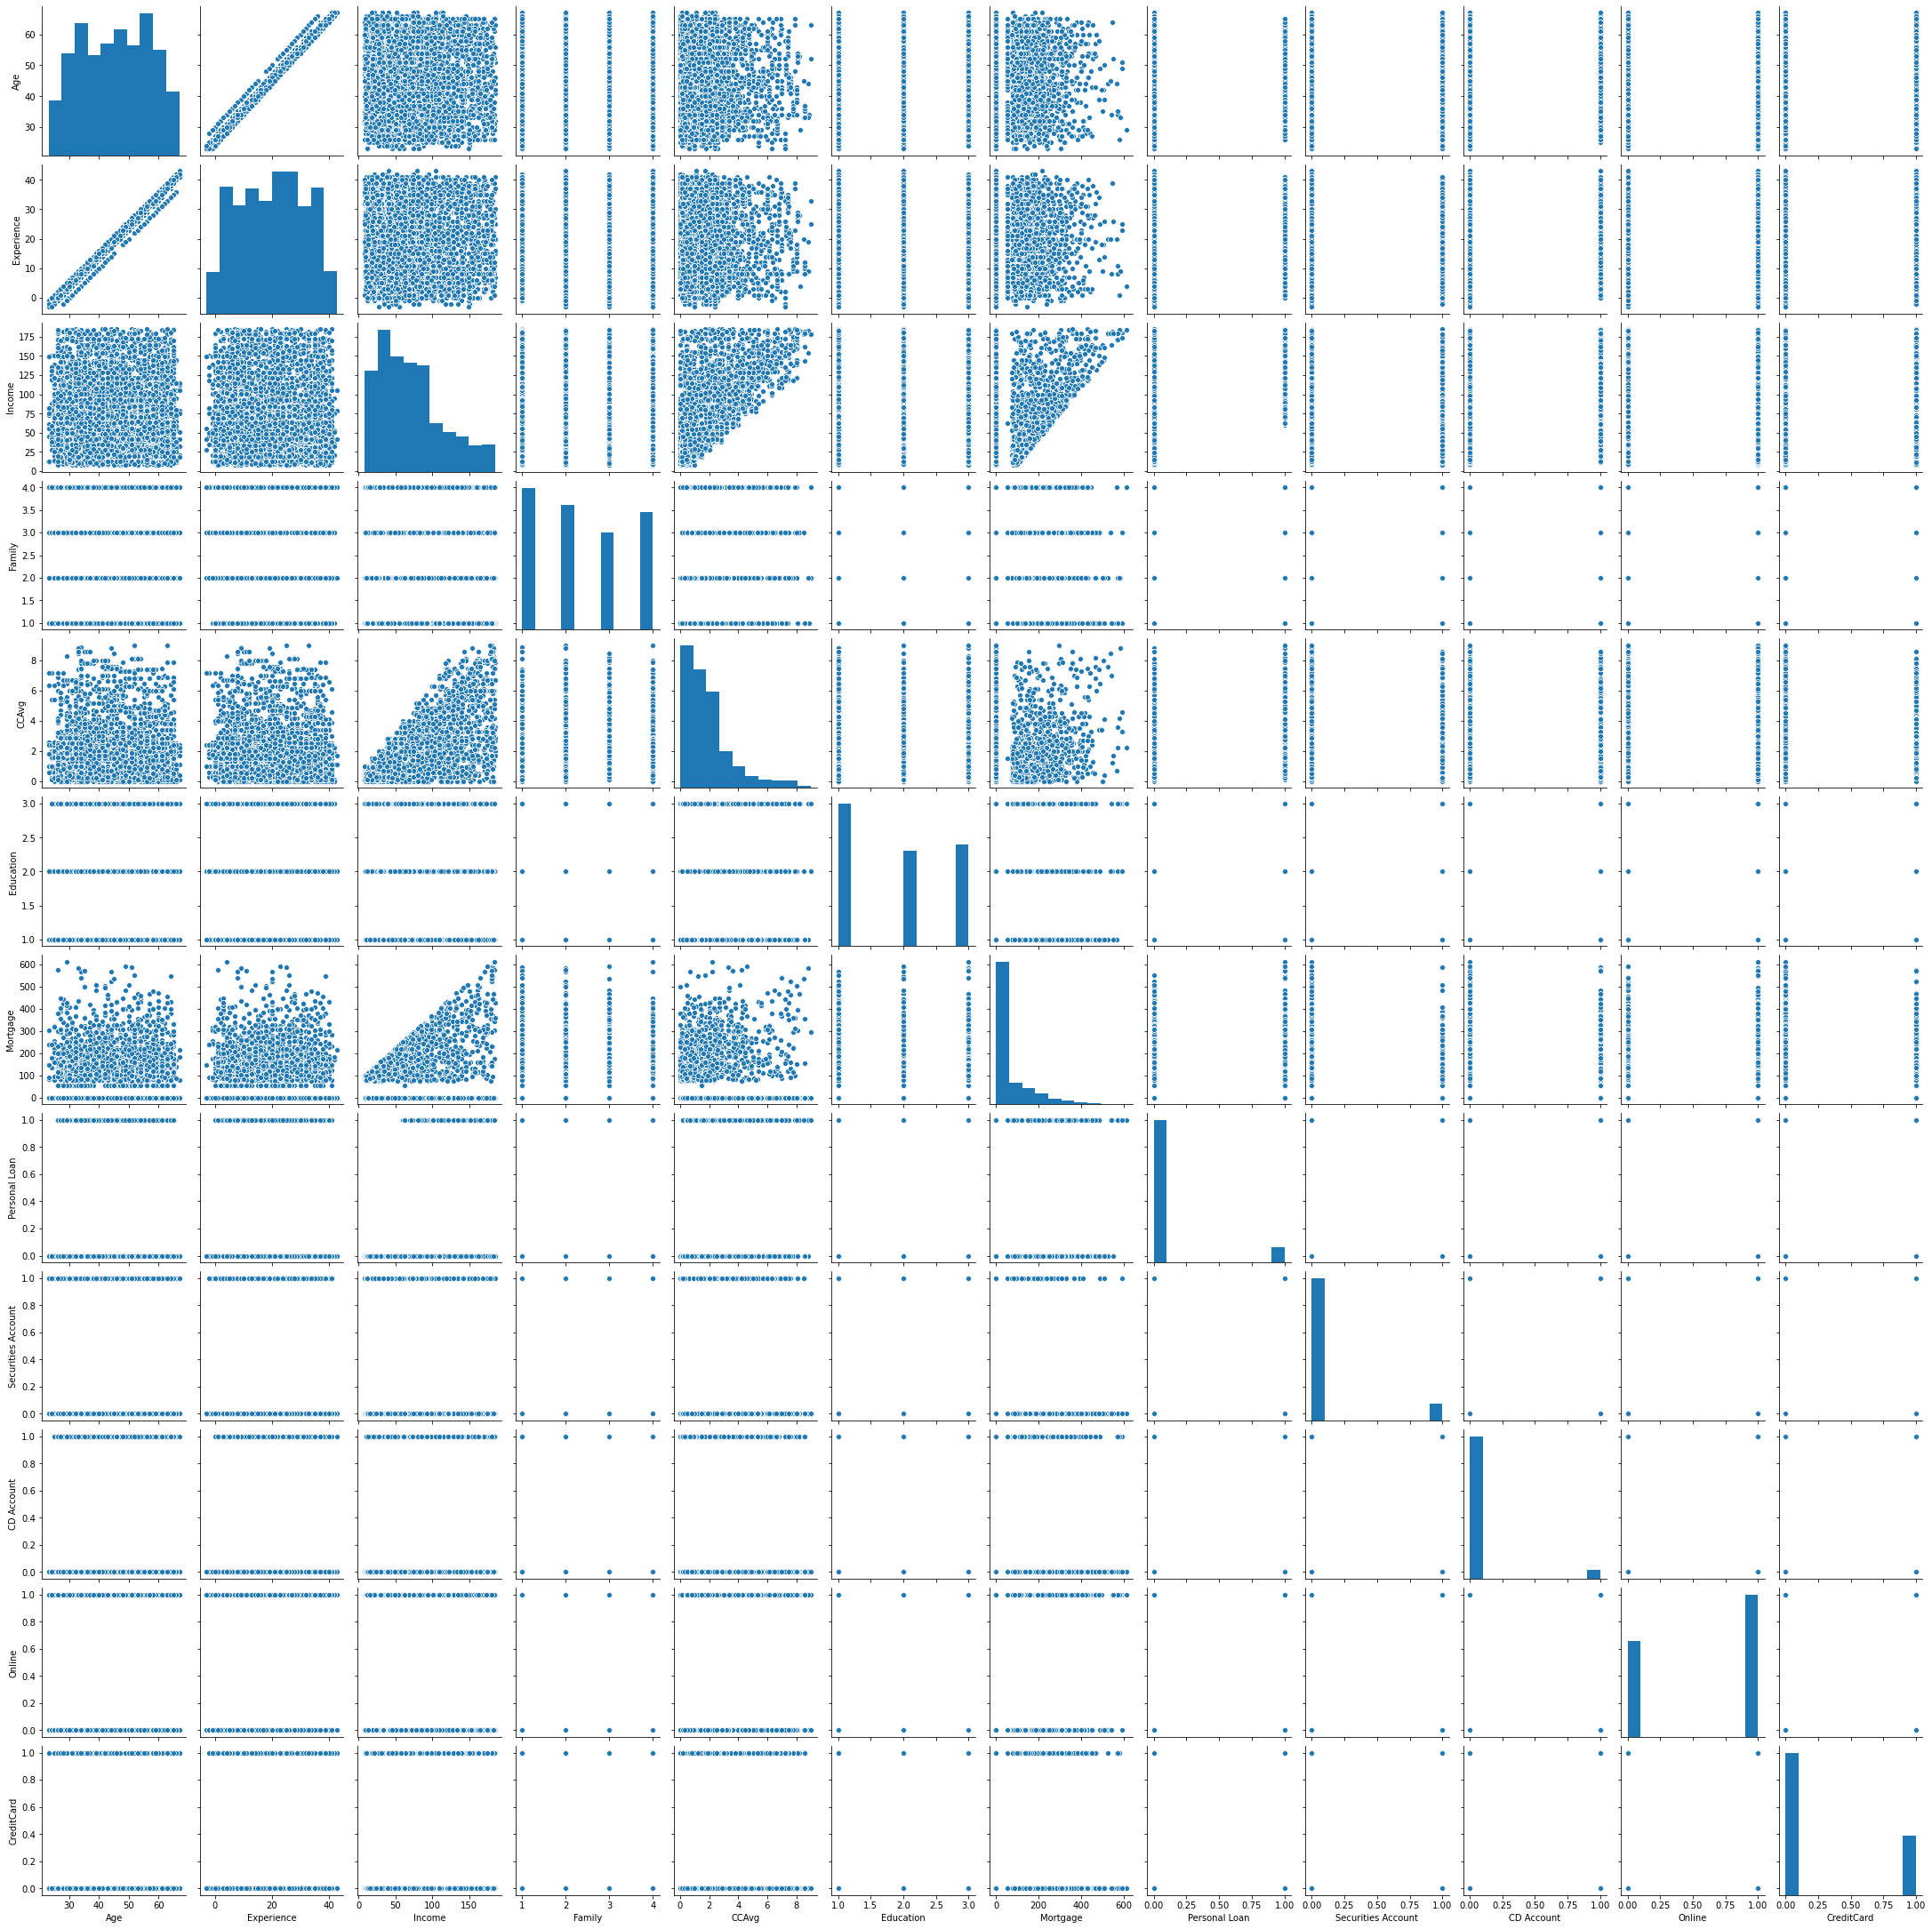

In [157]:
#Pairplot of all the columns in the dataset

sns.pairplot(loan,palette='husl');

In [158]:
loan['CreditCard'].value_counts()

# credit card issued by the bank is 1470 and not issued is 3530.

0    3530
1    1470
Name: CreditCard, dtype: int64

In [159]:
loan['Personal Loan'].value_counts()

# customers did not accept the loan is 4520 and accepted are 480.

0    4520
1     480
Name: Personal Loan, dtype: int64

In [160]:
# Distrubution of Credit Card, Personal Loan column.

pd.crosstab(index = loan['CreditCard'],columns = loan['Personal Loan'])

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


In [161]:
loan['Online'].value_counts()

# customers have online account are 2984 and dont have are 2016.

1    2984
0    2016
Name: Online, dtype: int64

In [162]:
# Distrubution of Online, Personal Loan column.

pd.crosstab(index = loan['Online'],columns = loan['Personal Loan'])

Personal Loan,0,1
Online,,
0,1827,189
1,2693,291


In [163]:
loan['Education'].value_counts()

# undergrad - 2096
# Graduate - 1501
# Advanced/Professional - 1403

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [164]:
# Distrubution of Education, Personal Loan column.

pd.crosstab(index = loan['Education'],columns = loan['Personal Loan'])

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


In [165]:
loan['Family'].value_counts()

# Size of family 
# 1 - 1472
# 2 - 1296
# 3 - 1222
# 4 - 1010

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [166]:
# Distrubution of Family, Personal Loan column.

pd.crosstab(index = loan['Family'],columns = loan['Personal Loan'])

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


In [167]:
# Distrubution of Secutities Account, Credit Card column.

pd.crosstab(index = loan['Securities Account'],columns = loan['CreditCard'])

CreditCard,0,1
Securities Account,,
0,3151,1327
1,379,143


In [168]:
loan['Securities Account'].value_counts()

# customers 4478 have securities accounts and 522 have accounts.

0    4478
1     522
Name: Securities Account, dtype: int64

In [169]:
# Distrubution of Secutities Account, Personal Loan column.

pd.crosstab(index = loan['Securities Account'],columns = loan['Personal Loan'])

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60


In [ ]:
# Continuous variables : Age, Experience, Income, CCAvg, Mortgage.
# Categorical variables : 'Family', 'Education', 'Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard'

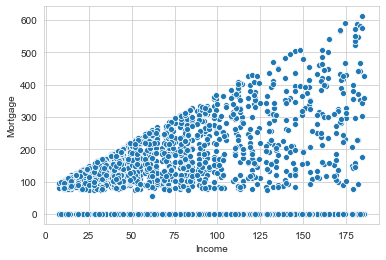

In [259]:
#  jointplot for the Mortgage and Income

sns.scatterplot(y = loan['Mortgage'],x = loan['Income']);

# As the Income is increasing the Mortagage is also increasing but there are also people who also have less mortagage with high income.

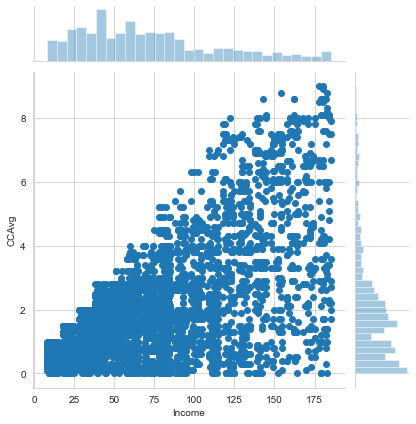

In [258]:
#  jointplot for the CCAvg and Income

sns.jointplot(y = loan['CCAvg'],x = loan['Income']);

# As the Income is increasing the CCAvg is also increasing but there are also people who also have less CCAvg with high income.

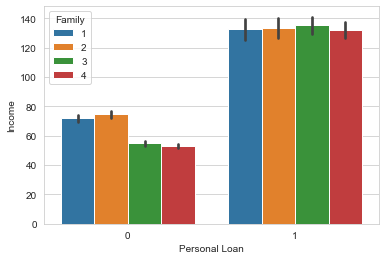

In [254]:
# Distrubution of the Personal loan and the income.

sns.barplot(x = loan['Personal Loan'],y = loan['Income'],hue = loan['Family']);

# The people who are taking personal loan has the income high compared to the non takers.

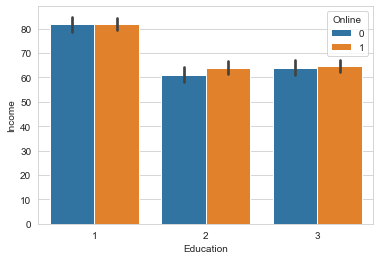

In [250]:
# distribution of the Education, online and the Age

sns.barplot(x = loan['Education'],y = loan['Income'],hue = loan['Online']);

# The income of the undergrad is high compare to the graduate, advanced/professional and there are online users.

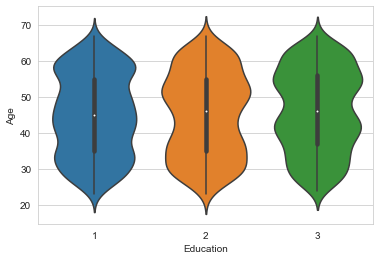

In [253]:
# distribution of the Education and the Age.

sns.violinplot(x = loan['Education'],y = loan['Age']);

# The distrubution of betweeen the Age and Education are almost same.

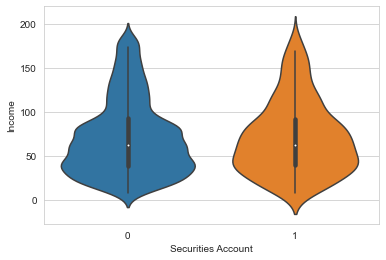

In [230]:
# distribution of the Securities account and the Income.

sns.violinplot(x = loan['Securities Account'],y = loan['Income']);

# The customers who dont have the security account has the same income as the who have.(No pattern)

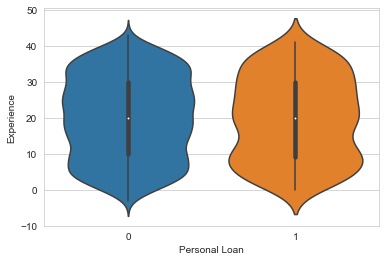

In [236]:
# Distrubution between Personal loan and Experience

sns.violinplot(x = loan['Personal Loan'],y = loan['Experience']);

# The customers opted for the personal loan has the same experience level of the as not opten(no pattern found)

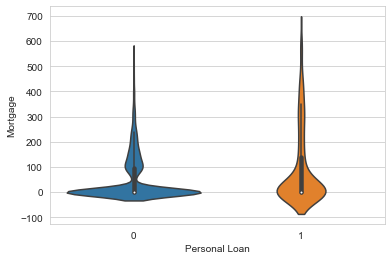

In [226]:
# Distrubution between Personal loan and Mortgage

sns.violinplot(x = loan['Personal Loan'],y = loan['Mortgage']);

# For customers who didnt opted for the personal loan is from -10 to 600 and for opted customers has from -90 to 700(has more weight)

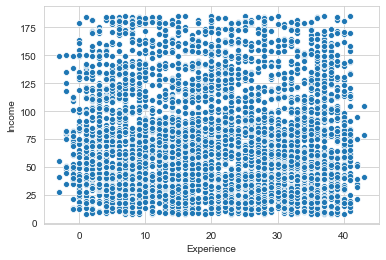

In [228]:
# distribution between Income with Expereience

sns.scatterplot(loan['Experience'],loan['Income']);

# When we look at the plot Income for all type of expereiences lies between 0$ and 175$

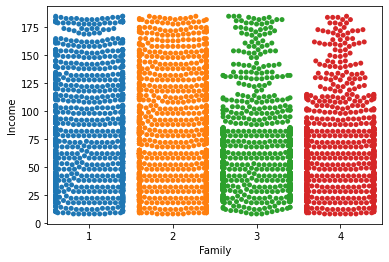

In [209]:
# Distrubution of family and Income.

sns.swarmplot(loan['Family'],loan['Income']);

# when we look at the plot. we can say that family with 2 numbers earns high Income. 

MODEL BUILDING

4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)

LOGISTIC REGRESSION

In [170]:
# Importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [171]:
# Making copy of original dataframe 'loan' to 'logistic_loan'.

logistic_loan = loan.copy()
logistic_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1


In [172]:
# As the logistic Regression doesn't allow labels. so, converting labels into one-hot encoded data(0's and 1's)

logistic_loan_withdummies = pd.get_dummies(data =logistic_loan ,columns = ['Family','Education'])

In [173]:
logistic_loan_withdummies.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49.0,1.6,0.0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34.0,1.5,0.0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11.0,1.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100.0,2.7,0.0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45.0,1.0,0.0,0,0,0,0,1,0,0,0,1,0,1,0


In [174]:
# Splitting of the data into X_logit and y_logit.

X_logit = logistic_loan_withdummies[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2',
       'Education_3']]
y_logit = logistic_loan_withdummies['Personal Loan']

In [175]:
# Splitting the data into training and testing data. Training 70% and testing 30%

X_train, X_test, y_train, y_test = train_test_split(X_logit, y_logit, test_size=0.30, random_state=42)

In [176]:
logit = LogisticRegression()

In [177]:
# fitting the train data into our model.

logit.fit(X_train,y_train)

c:\users\dgandra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [178]:
# Getting the Score of the model with training data.

train_set = logit.score(X_train,y_train)
print('Accuracy for the Training set is {} %'.format(train_set*100))

Accuracy for the Training set is 95.74285714285715 %


In [179]:
# Getting the Score of the model with testing data.

test_set = logit.score(X_test,y_test)
print('Accuracy for the Testing set is {} %'.format(test_set*100))
print( ' ')
print('As the Accuracy for the Training and the Testing set is almost same model is perfect with no overfitting or underfitting')

Accuracy for the Testing set is 95.6 %
 
As the Accuracy for the Training and the Testing set is almost same model is perfect with no overfitting or underfitting


In [264]:
# Predicted values for X_test values.

y_predict = logit.predict(X_test)


In [265]:
# confusion Matrix for the y_predict and y_test

pd.DataFrame(confusion_matrix(y_predict,y_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])

,actual 0,actual 1
predict 0,1327,50
predict 1,16,107


In [182]:
# Classification report of the y_predict, y_test

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1377
           1       0.68      0.87      0.76       123

    accuracy                           0.96      1500
   macro avg       0.83      0.92      0.87      1500
weighted avg       0.96      0.96      0.96      1500



K Nearset Neighbour Classifier

In [183]:
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [184]:
# Making copy of original dataframe 'loan' to 'knn_loan'.

knn_loan = loan.copy()
knn_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1


In [185]:
# Splitting the data into X_knn and y_knn.

X_knn = knn_loan[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage','Securities Account', 'CD Account','Online', 'CreditCard']]
y_knn = knn_loan['Personal Loan']

In [186]:
# A swe are using knn. The data schould be normalized so, we normalizing the data using zscore.

X_scaled = X_knn.apply(zscore)
X_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.519080,1.397414,-0.163299,-1.049078,-0.564738,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.869384,0.525991,-0.223634,-1.049078,-0.564738,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.406517,-1.216855,-0.525311,-1.049078,-0.564738,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.671953,-1.216855,0.500390,0.141703,-0.564738,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.612495,1.397414,-0.525311,0.141703,-0.564738,-0.341423,-0.25354,-1.216618,1.549632


In [187]:
# Splitting the data into training and testing data. Training 70% and testing 30%

X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y_knn, test_size=0.30, random_state=42)

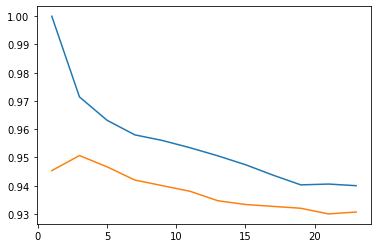

In [188]:
# To get the best values of 'k' iteration is used.
# the model has highest accuracy are considered as the best 'k'.

# Checking the accuracy of the train data 

scores_train =  [ ]
for n in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors = n )
    knn.fit(X1_train,y1_train)
    scores_train.append(knn.score(X1_train,y1_train))
    

# Checking the accuracy of the test data

scores_test =  [ ]
for n in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors = n )
    knn.fit(X1_train,y1_train)
    scores_test.append(knn.score(X1_test,y1_test))

plt.plot(range(1,25,2),scores_train);
plt.plot(range(1,25,2),scores_test);

When we at look the above accuracy graphs of the train and test data. The Accuracy doesnt change much between train and test data.
SO, we can conclude that the model is underfitted or overfitted. It works perfectly good.
At K = 3, the accuracy of the model is good.

In [189]:
print('At k = 3 the score of train data is around 97%')
print(' ')
print('At k = 3 the score of test data is around 95%')

At k = 3 the score of train data is around 97%
 
At k = 3 the score of test data is around 95%


In [190]:
# fitting the train data with the value of k = 3

knn1 = KNeighborsClassifier(n_neighbors = 3 )
knn1.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=3)

In [191]:
# calculating the score for the train data

knn1.score(X1_train,y1_train)


0.9714285714285714

In [192]:
# calculating the score for the test data

knn1.score(X1_test,y1_test)

0.9506666666666667

In [267]:
# Predicted values for X_test values and the finding the score of y_predict and X_test.

y_predict_knn = knn1.predict(X1_test)

In [195]:
# confusion Matrix for the y_predict and y_test

pd.DataFrame(confusion_matrix(y_predict_knn,y1_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])

,actual 0,actual 1
predict 0,1331,62
predict 1,12,95


In [196]:
# Classification report of the y_predict, y_test

print(classification_report(y_predict_knn,y1_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1393
           1       0.61      0.89      0.72       107

    accuracy                           0.95      1500
   macro avg       0.80      0.92      0.85      1500
weighted avg       0.96      0.95      0.95      1500



Naive Bayes classifier

In [197]:
# Making copy of original dataframe 'loan' to 'logistic_loan'.

naive_loan = loan.copy()
naive_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1


In [198]:
# Splitting of the data into X_naive and y_naive.

X_naive = naive_loan[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage','Securities Account',
                      'CD Account','Online', 'CreditCard']]
y_naive = naive_loan['Personal Loan']

In [199]:
# Splitting the data into training and testing data. Training 70% and testing 30%

X2_train, X2_test, y2_train, y2_test = train_test_split(X_naive, y_naive, test_size=0.30, random_state=42)

In [200]:
# Importing libraries

from sklearn.naive_bayes import GaussianNB

In [201]:
naivebayes = GaussianNB()

In [202]:
# fitiing the train data into our model.

naivebayes.fit(X2_train,y2_train)

GaussianNB()

In [203]:
# Getting the Score of the model with training data.

train_set2 = naivebayes.score(X2_train,y2_train)
print('Accuracy for the Training set is {} %'.format(train_set2*100))

Accuracy for the Training set is 88.31428571428572 %


In [204]:
# Getting the Score of the model with testing data.

test_set2 = naivebayes.score(X2_test,y2_test)
print('Accuracy for the Testing set is {} %'.format(test_set2*100))
print(' ')
print('As the Accuracy for the Training and the Testing set is almost same. model is perfect with no overfitting or underfitting')

Accuracy for the Testing set is 88.73333333333333 %
 
As the Accuracy for the Training and the Testing set is almost same. model is perfect with no overfitting or underfitting


In [268]:
# Predicted values for X2_test values.

y2_predict = naivebayes.predict(X2_test)

In [206]:
# confusion Matrix for the y_predict and y_test

pd.DataFrame(confusion_matrix(y2_predict,y2_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])

,actual 0,actual 1
predict 0,1241,67
predict 1,102,90


In [207]:
# Classification report of the y2_predict, y2_test

print(classification_report(y2_predict,y2_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1308
           1       0.57      0.47      0.52       192

    accuracy                           0.89      1500
   macro avg       0.75      0.71      0.73      1500
weighted avg       0.88      0.89      0.88      1500



7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

In [274]:
print('Accuracy for the Logistice Regression is 95.6 %')
print('Accuracy for the Naivebayes is 88.7 % ')
print('Accuracy for the knn is 95.06 % ')

Accuracy for the Logistice Regression is 95.6 %
Accuracy for the Naivebayes is 88.7 % 
Accuracy for the knn is 95.06 % 


In [281]:
print( ' logistic regression F1- Score  ')
print( ' 0 - 0.98')
print( ' 1 - 0.76')

 logistic regression F1- Score  
 0 - 0.98
 1 - 0.76


In [282]:
print( ' knn F1- Score  ')
print( ' 0 - 0.97')
print( ' 1 - 0.72')

 knn F1- Score  
 0 - 0.97
 1 - 0.72


In [283]:
print( ' knn F1- Score  ')
print( ' 0 - 0.94')
print( ' 1 - 0.52')

 knn F1- Score  
 0 - 0.94
 1 - 0.52


In [279]:
print('-- >  I consider logistic Regression as the best model because it got the highest score of all the three models. ')
print('-- >  F1 Score of the Logistic Regression is best compared to other models. ')

-- >  I consider logistic Regression as the best model because it got the highest score of all the three models. 
-- >  F1 Score of the Logistic Regression is best compared to other models. 
